<a href="https://colab.research.google.com/github/eyataarit/ML/blob/main/Analysis_of_covid_19_cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analysis of covid-19 cases around the world (50 countries)

In [1]:
import os
import pandas as pd
import numpy as np
from scipy.stats import pearsonr # for correlation
import matplotlib.pyplot as plt #for graphic visualization 
from sklearn.decomposition import PCA # analyze
from sklearn.preprocessing import StandardScaler #centralization 

In [35]:
Covid19='Coronavirus 03-2021.xlsx'
Covid19_df= pd.read_excel(Covid19,sheet_name=0, header=0, index_col=0)
Covid19_df.head()

,Cases,Deaths,Recovered,ActiveCases,Critical,Tests,Population
Country,,,,,,,
USA,30434541,554196.0,22612032,7268313,9054,387534674,332389130
Brazil,11877009,290525.0,10383460,1203024,8318,28600000,213638142
Russia,4447570,94659.0,4060652,292259,2300,117000000,145979262
France,4181607,91679.0,278263,3811665,4246,58498845,65376842
Italy,3356331,104642.0,2686236,565453,3387,46613817,60398128


In [3]:
Covid19_df.shape
#( 50 countries , 7 variables )

(50, 7)

In [6]:
sc= StandardScaler()
X=sc.fit_transform(Covid19_df)
X
#centralized matrix

array([[ 6.34838002e+00,  5.91652321e+00,  6.16620032e+00,
         6.11411633e+00,  4.18455185e+00,  6.11428543e+00,
         1.26298607e+00],
       [ 2.26536681e+00,  2.92038316e+00,  2.63676931e+00,
         7.92895809e-01,  3.80009594e+00,  1.00936510e-01,
         6.85397136e-01],
       [ 6.30747638e-01,  6.94723280e-01,  8.11869828e-01,
        -6.13972035e-03,  6.56542045e-01,  1.58193036e+00,
         3.56313385e-01],
       [ 5.72230674e-01,  6.60861015e-01, -2.79809646e-01,
         3.08151784e+00,  1.67305183e+00,  6.01841550e-01,
        -3.57260155e-02],
       [ 3.90654114e-01,  8.08161869e-01,  4.15183571e-01,
         2.33539793e-01,  1.22434581e+00,  4.02727824e-01,
        -5.99418151e-02],
       [ 3.58971570e-01,  4.47585559e-01,  4.89997197e-01,
        -9.23657050e-02,  4.98267397e-01,  3.10592952e-01,
        -1.26238186e-01],
       [ 3.06013171e-01, -4.15537264e-02,  4.44773354e-01,
        -1.28304384e-01,  2.63206038e-01,  2.24497954e-01,
         5.9649953

In [7]:
np.mean(X,axis=0)
#mean

array([ 1.77635684e-17, -5.88418203e-17, -9.99200722e-18, -1.55431223e-17,
        7.54951657e-17,  2.44249065e-17, -1.55431223e-17])

In [8]:
np.std(X,axis=0)
#standard derivation 

array([1., 1., 1., 1., 1., 1., 1.])

In [9]:
acp=PCA()
V=acp.fit_transform(X)
print(V)
#correlation matrix

[[ 1.43024076e+01 -3.38860060e-01 -1.53824063e+00 -3.88028476e-01
  -8.72514736e-02  6.05243644e-02  8.31466427e-05]
 [ 5.17776020e+00 -9.14861229e-01  2.83705092e+00 -2.56243271e-01
  -6.30851725e-01 -6.15074911e-02 -1.04777499e-04]
 [ 1.81005386e+00  4.58961233e-01 -3.47311620e-02 -6.32871426e-01
   8.38544556e-01 -9.12896951e-02  9.45033075e-05]
 [ 2.47606910e+00 -5.49396624e-01 -4.64689793e-01  2.61682946e+00
   1.94368558e-02 -6.29060014e-02 -1.21217850e-04]
 [ 1.38388689e+00 -3.40840565e-01  6.85083540e-01  1.28813705e-01
   3.56379045e-01 -2.30664523e-01  2.81350600e-04]
 [ 8.02063484e-01 -2.37650724e-01  2.96030085e-01 -3.36384549e-01
   1.91848652e-01 -3.34451246e-02  6.17685247e-06]
 [ 4.42674083e-01  1.78648883e-02  1.60296471e-01 -3.03049818e-01
   1.29677053e-01  3.19782381e-01 -6.58755892e-04]
 [ 9.19787311e-01 -8.40603619e-02  6.28885465e-01 -8.84819264e-02
   4.55049291e-01 -9.43697581e-02  3.00417670e-05]
 [ 5.88311087e-01 -4.62732618e-01  1.09590903e+00  2.48354921e-0

In [10]:
vp=acp.explained_variance_
vp

array([5.51850464e+00, 1.07122404e+00, 3.32809606e-01, 1.70634951e-01,
       4.24423837e-02, 7.24144006e-03, 7.86045992e-08])

In [11]:
print(acp.explained_variance_ratio_)

[7.72590650e-01 1.49971366e-01 4.65933448e-02 2.38888931e-02
 5.94193372e-03 1.01380161e-03 1.10046439e-08]


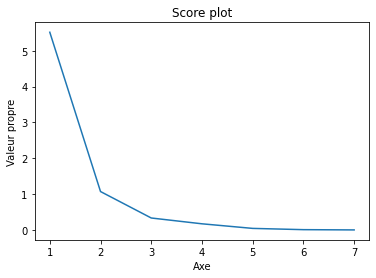

In [16]:
p=Covid19_df.shape[1]
p
plt.plot(np.arange(1,p+1),vp)
plt.title("Score plot")
plt.ylabel("Valeur propre")
plt.xlabel("Axe")
plt.show()

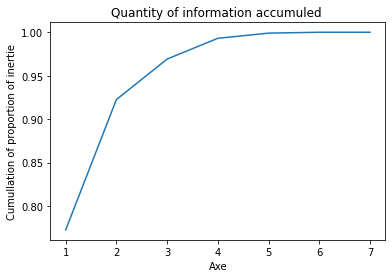

In [15]:
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Quantity of information accumuled ")
plt.ylabel("Cumullation of proportion of inertie")
plt.xlabel("Axe")
plt.show()

In [17]:
seuil=1/np.arange(p,0,-1) 
seuil=np.cumsum(seuil)
seuil=seuil[::-1]
print(pd.DataFrame({'Val propre':vp, 'Seuils':seuil}))
#choix des axes: l'axe valide c'est  qui a une vp>seuil
#choose the axe with the highest vp (greater than the seuil ) 

     Val propre    Seuils
0  5.518505e+00  2.592857
1  1.071224e+00  1.592857
2  3.328096e-01  1.092857
3  1.706350e-01  0.759524
4  4.244238e-02  0.509524
5  7.241440e-03  0.309524
6  7.860460e-08  0.142857


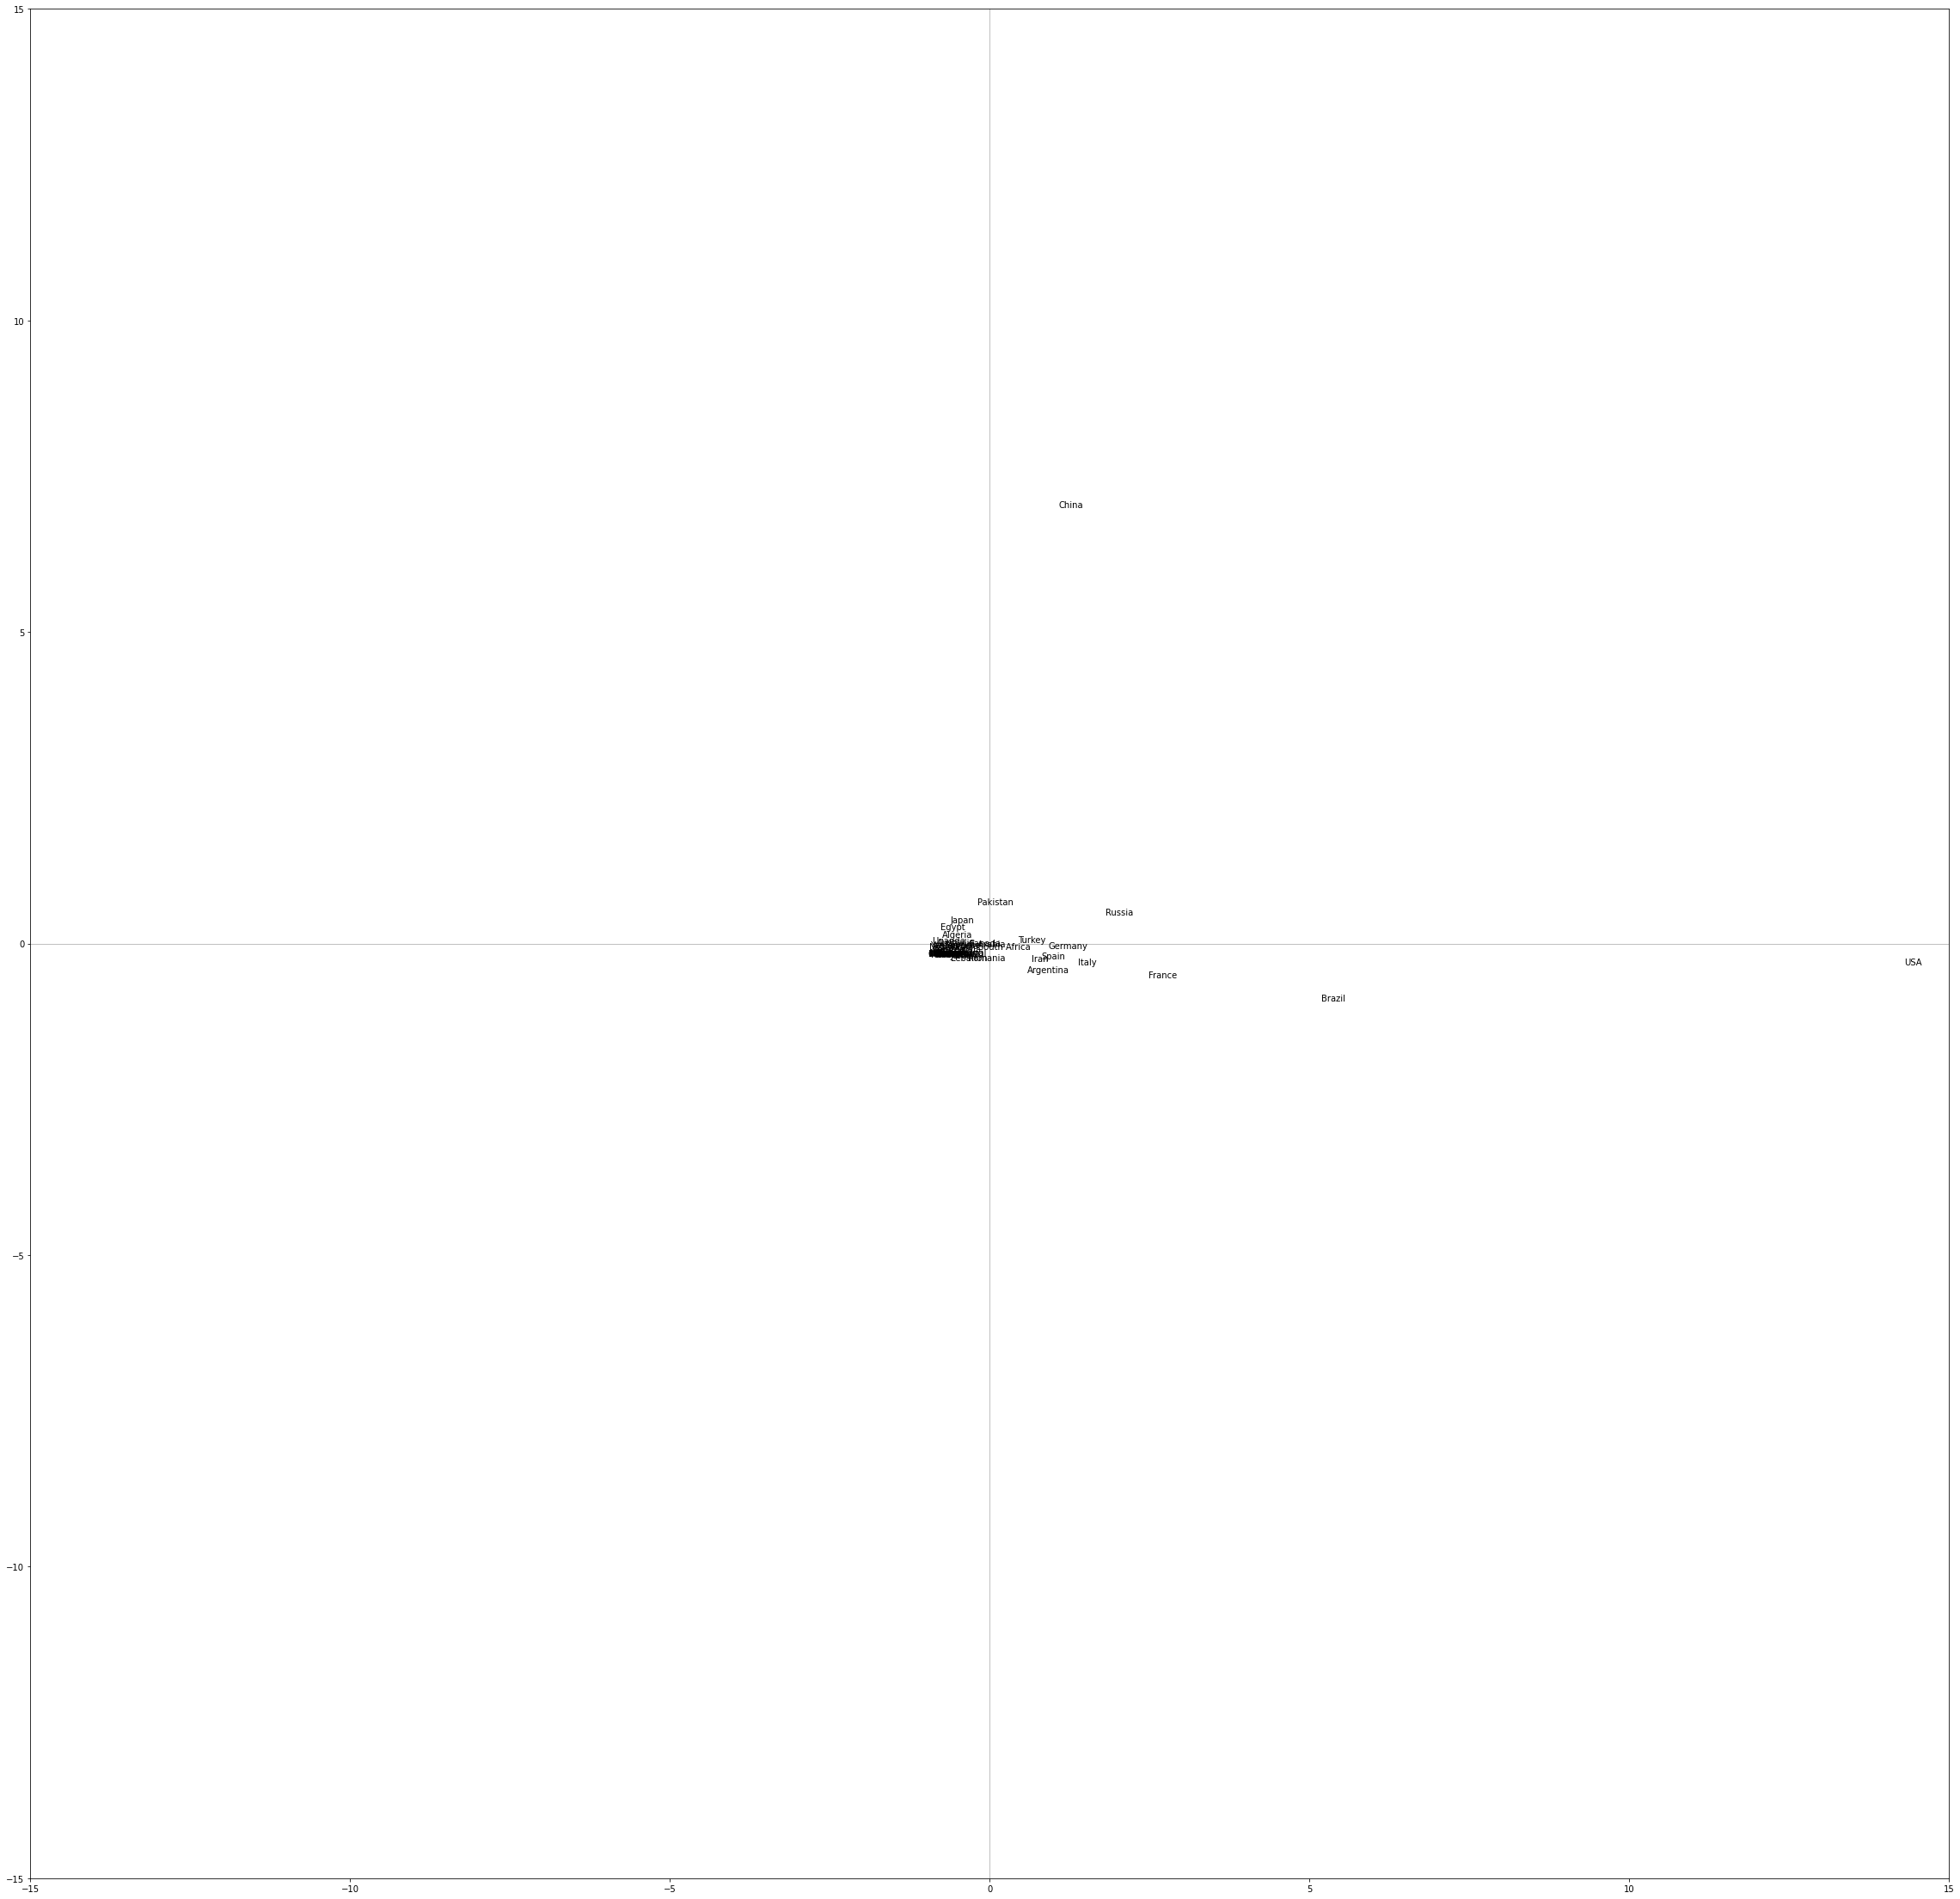

In [19]:
#positionnement of individuals in the first plan
fig, axes = plt.subplots(figsize=(40,40))
axes.set_xlim(-15,15)
axes.set_ylim(-15,15) 

n=Covid19_df.shape[0]
n
coord = acp.fit_transform(X)
for i in range(n):
 plt.annotate(Covid19_df.index[i],(coord[i,0],coord[i,1]))

plt.plot([-15,15],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-15,15],color='silver',linestyle='-',linewidth=1)

plt.show()

In [36]:
#contribution of individuals in the total inertie 
di = np.sum(X**2,axis=1)
print(pd.DataFrame({'Country':Covid19_df.index,'d_i':di}).head())

  Country         d_i
0     USA  207.201715
1  Brazil   36.162447
2  Russia    4.600164
3  France   13.500823
4   Italy    2.697460


In [37]:
#quality of  représentation of individuals - COS2
cos2 = V**2
for j in range(p):
 cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'Country':Covid19_df.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}).head())

  Country    COS2_1    COS2_2
0     USA  0.987245  0.000554
1  Brazil  0.741355  0.023145
2  Russia  0.712213  0.045791
3  France  0.454114  0.022357
4   Italy  0.709980  0.043067


In [22]:
print(np.sum(cos2,axis=1))
#verify that for every individual sum(cos2 = 1)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [40]:
#contributions for axes
ctr = V**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*vp[j])
 print(pd.DataFrame({'Country':Covid19_df.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}).head())

  Country     CTR_1     CTR_2
0     USA  0.741356  0.114826
1  Brazil  0.097161  0.836971
2  Russia  0.011874  0.210645
3  France  0.022219  0.301837
4   Italy  0.006941  0.116172
  Country     CTR_1     CTR_2
0     USA  0.741356  0.002144
1  Brazil  0.097161  0.015626
2  Russia  0.011874  0.003933
3  France  0.022219  0.005635
4   Italy  0.006941  0.002169
  Country     CTR_1     CTR_2
0     USA  0.741356  0.002144
1  Brazil  0.097161  0.015626
2  Russia  0.011874  0.003933
3  France  0.022219  0.005635
4   Italy  0.006941  0.002169
  Country     CTR_1     CTR_2
0     USA  0.741356  0.002144
1  Brazil  0.097161  0.015626
2  Russia  0.011874  0.003933
3  France  0.022219  0.005635
4   Italy  0.006941  0.002169
  Country     CTR_1     CTR_2
0     USA  0.741356  0.002144
1  Brazil  0.097161  0.015626
2  Russia  0.011874  0.003933
3  France  0.022219  0.005635
4   Italy  0.006941  0.002169
  Country     CTR_1     CTR_2
0     USA  0.741356  0.002144
1  Brazil  0.097161  0.015626
2  Russia 

In [24]:

print(acp.components_)

[[ 4.24796039e-01  4.22865075e-01  4.17465685e-01  3.92257960e-01
   3.77978100e-01  3.88924319e-01  1.35867501e-01]
 [-1.06529875e-01 -1.20115414e-01 -1.03599842e-01 -1.00744490e-01
  -1.64899816e-01  3.00655359e-01  9.14196751e-01]
 [-7.54004437e-02  1.34179700e-01  5.04614313e-02 -4.64951073e-01
   7.19526791e-01 -4.29964029e-01  2.34514084e-01]
 [-2.09790286e-01 -1.67467869e-01 -5.03565364e-01  7.06571204e-01
   3.75521873e-01 -1.58782335e-01  9.43032298e-02]
 [-2.34201565e-01 -2.30937100e-01 -2.10541761e-01 -2.76608124e-01
   3.86592201e-01  7.35400067e-01 -2.84096826e-01]
 [ 3.10409748e-01 -8.40948621e-01  4.00394480e-01  7.58330390e-02
   1.47483592e-01 -8.63136945e-02  3.43999008e-02]
 [ 7.79293228e-01 -1.34614202e-02 -5.95165078e-01 -1.95701736e-01
  -4.32086068e-04  1.40199420e-04 -9.53803072e-05]]


In [27]:
sqrt_vp = np.sqrt(vp)
W = np.zeros((p,p))
for k in range(p):
 W[:,k] = acp.components_[k,:] * sqrt_vp[k]
 print(W)

[[0.99790952 0.         0.         0.         0.         0.
  0.        ]
 [0.99337339 0.         0.         0.         0.         0.
  0.        ]
 [0.98068942 0.         0.         0.         0.         0.
  0.        ]
 [0.9214727  0.         0.         0.         0.         0.
  0.        ]
 [0.88792717 0.         0.         0.         0.         0.
  0.        ]
 [0.91364147 0.         0.         0.         0.         0.
  0.        ]
 [0.31917311 0.         0.         0.         0.         0.
  0.        ]]
[[ 0.99790952 -0.11025837  0.          0.          0.          0.
   0.        ]
 [ 0.99337339 -0.1243194   0.          0.          0.          0.
   0.        ]
 [ 0.98068942 -0.10722579  0.          0.          0.          0.
   0.        ]
 [ 0.9214727  -0.1042705   0.          0.          0.          0.
   0.        ]
 [ 0.88792717 -0.17067123  0.          0.          0.          0.
   0.        ]
 [ 0.91364147  0.31117816  0.          0.          0.          0.
   0.     

In [28]:
print(pd.DataFrame({'id':Covid19_df.columns,'COR_1':W[:,0],'COR_2':W[:,1]}))

            id     COR_1     COR_2
0        Cases  0.997910 -0.110258
1       Deaths  0.993373 -0.124319
2    Recovered  0.980689 -0.107226
3  ActiveCases  0.921473 -0.104271
4     Critical  0.887927 -0.170671
5        Tests  0.913641  0.311178
6   Population  0.319173  0.946193


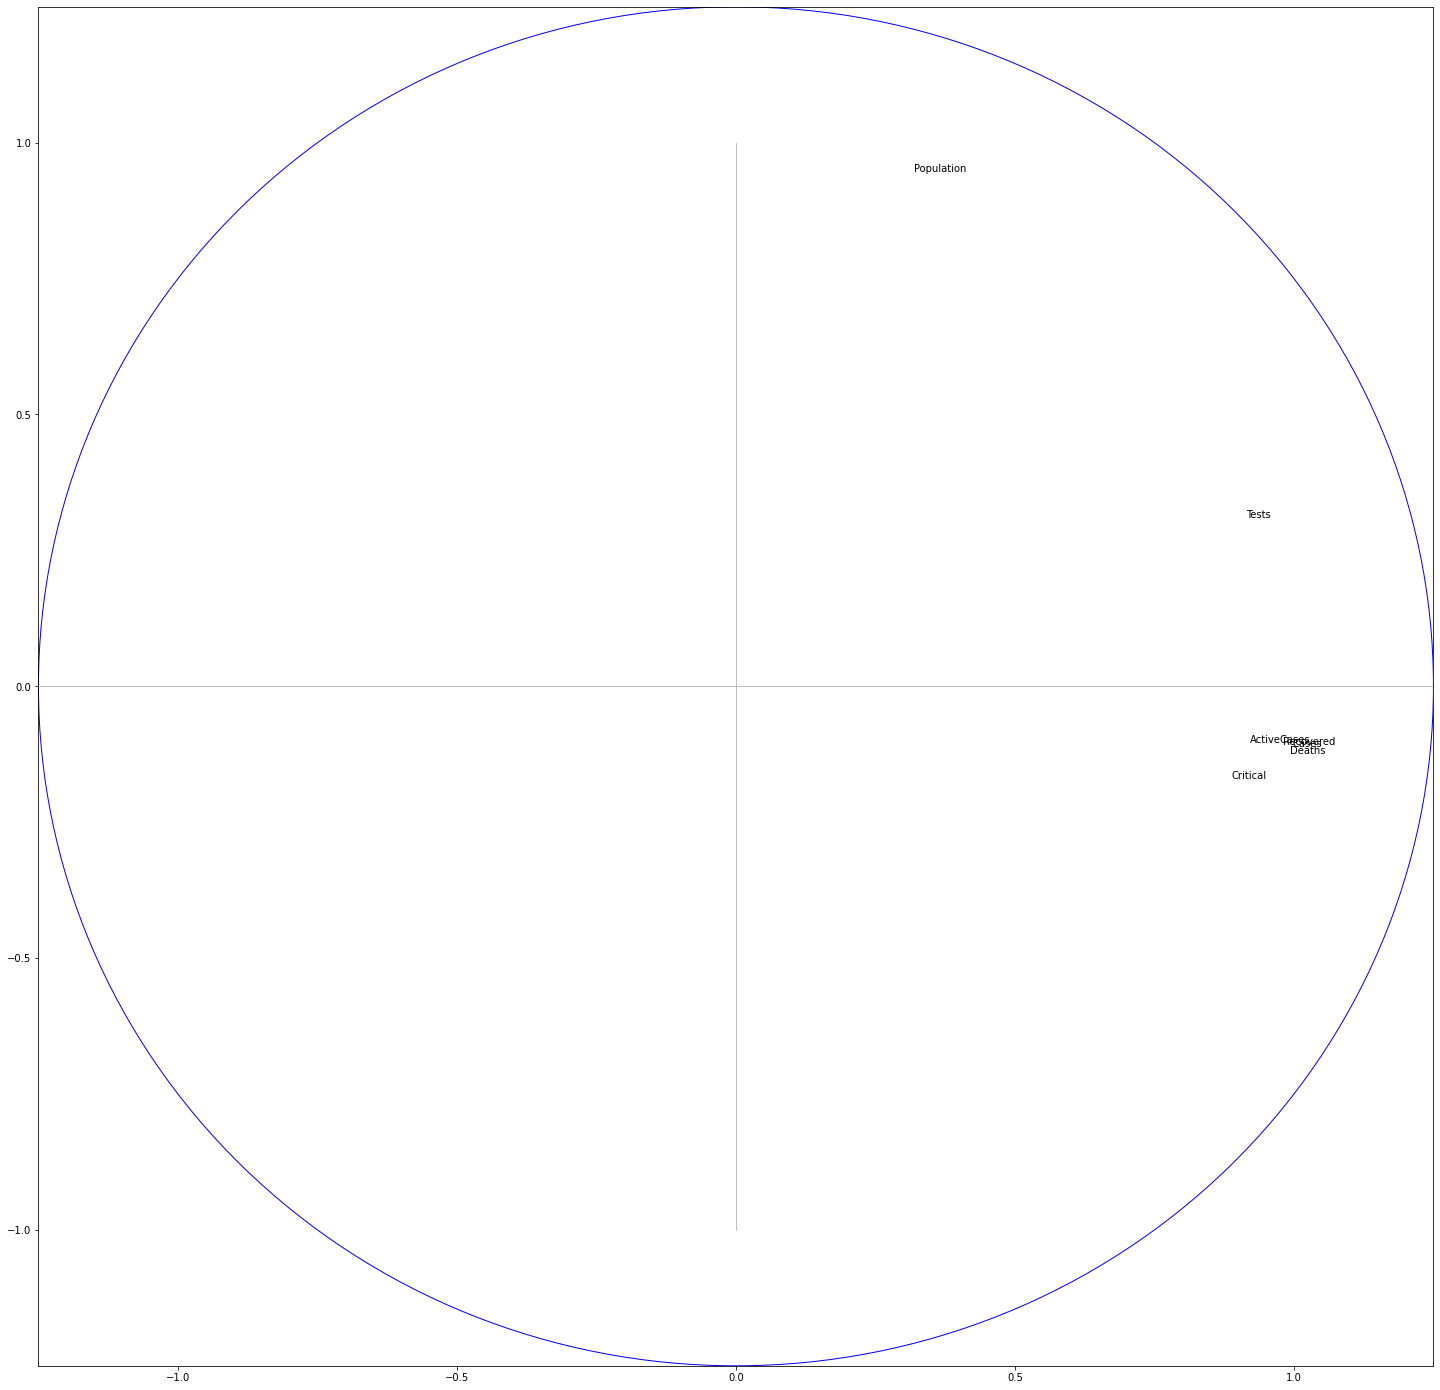

In [29]:
fig, axes = plt.subplots(figsize=(25,25))
axes.set_xlim(-1.25,1.25)
axes.set_ylim(-1.25,1.25)

for j in range(p):
 plt.annotate(Covid19_df.columns[j],(W[j,0],W[j,1]))

plt.plot([-1.25,1.25],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#add  cercle
cercle = plt.Circle((0,0),1.25,color='blue',fill=False)
axes.add_artist(cercle)

plt.show()

In [30]:
cos2_var = W**2
print(pd.DataFrame({'idVar':Covid19_df.columns,'COS2_1':cos2_var[:,0],'COS2_2':cos2_var[:,1]}))

         idVar    COS2_1    COS2_2
0        Cases  0.995823  0.012157
1       Deaths  0.986791  0.015455
2    Recovered  0.961752  0.011497
3  ActiveCases  0.849112  0.010872
4     Critical  0.788415  0.029129
5        Tests  0.834741  0.096832
6   Population  0.101871  0.895282


In [31]:
#contribution of variables
ctrvar = cos2_var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/vp[k]

print(pd.DataFrame({'idVar':Covid19_df.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

         idVar     CTR_1     CTR_2
0        Cases  0.180452  0.011349
1       Deaths  0.178815  0.014428
2    Recovered  0.174278  0.010733
3  ActiveCases  0.153866  0.010149
4     Critical  0.142867  0.027192
5        Tests  0.151262  0.090394
6   Population  0.018460  0.835756


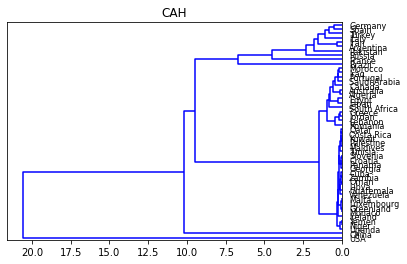

In [32]:
#clusstering librairies
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#linkage matrix
Z = linkage(X,method='ward',metric='euclidean')

# dendrogramme
plt.title("CAH")
dendrogram(Z,labels=Covid19_df.index,orientation='left',color_threshold=0)
plt.show()

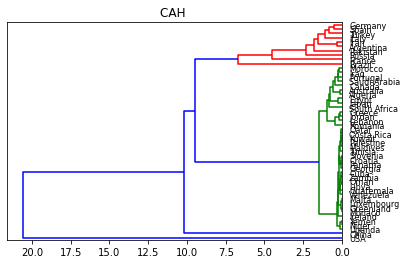

[4 2 2 2 2 2 2 2 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 3 1 1 1 1 1 1 1 1 1 1 1]


In [33]:
plt.title('CAH ')
dendrogram(Z,labels=Covid19_df.index,orientation='left',color_threshold=7)
plt.show()


groupes_cah = fcluster(Z,t=7,criterion='distance')
print(groupes_cah)

In [41]:
import numpy as np
idg = np.argsort(groupes_cah)

print(pd.DataFrame(Covid19_df.index[idg],groupes_cah[idg]).head())

      Country
1     Tunisia
1     Ireland
1   Palestine
1      Kuwait
1  Costa Rica
